# Individual Project EDA --> Machine Learning

## Introduction

### Analysis of a car dataset (vehicles.csv), from the Exploratory Data Analysis to the Machine Learning.
### Let´s get down to it...

### 1. First look

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Loading of the dataset
df = pd.read_csv("vehicles.csv")
# Show the first ten rows.
print(df.head(10))

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
5  7222379453  https://hudsonvalley.craigslist.org/cto/d/west...   
6  7221952215  https://hudsonvalley.craigslist.org/cto/d/west...   
7  7220195662  https://hudsonvalley.craigslist.org/cto/d/poug...   
8  7209064557  https://medford.craigslist.org/cto/d/grants-pa...   
9  7219485069  https://erie.craigslist.org/cto/d/erie-2012-su...   

                   region                           region_url  price  year  \
0                prescott      https://prescott.craigslist.org   6000   NaN   
1            fayetteville         https://fayar.craigslist.org  11900   NaN   
2            f

In [45]:
# Features
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [46]:
# Count the unique values of each feature
unique_values = df.nunique()
print(unique_values)

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64


In [47]:
# Statistical summary
print("\nStatistical summary:")
summary_before = df.describe()
print(summary_before)


Statistical summary:
                 id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max    

#### Comment: in the statistical summary overview the object Dtype features are affected

In [48]:
# Working with the'condition' feature
# Values and analysis
print(df['condition'].unique())

[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']


In [49]:
# Handling of NaN values in 'condition'. Count
nan_count = df['condition'].isna().sum()
print(f"Number of NaN values in 'condition': {nan_count}")

Number of NaN values in 'condition': 174104


In [50]:
total_rows = df.shape[0]
nan_percentage = (nan_count / total_rows) * 100
print(f"Total records: {total_rows}")
print(f"Valores NaN en 'condition': {nan_count} ({nan_percentage:.2f}%)")

Total records: 426880
Valores NaN en 'condition': 174104 (40.79%)


#### Comment: much of the dataset lacks information on the condition of vehicles. Replacing all those 'NaN' with the Mode (a possible option), may introduce significant bias. Therefore, we create a category 'Unknown'and we retain 'condition' because we consider this column essential for the analysis and further study.

In [51]:
df['condition'].fillna('Unknown', inplace=True)
print("\nDistribution of 'condition' after adjusting NaN to 'Unknown':")
print(df['condition'].value_counts())


Distribution of 'condition' after adjusting NaN to 'Unknown':
condition
Unknown      174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64


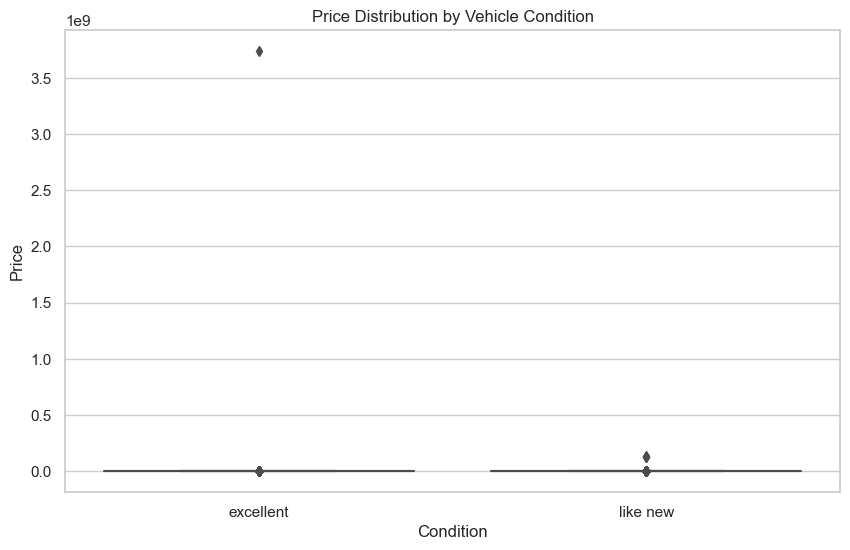

In [52]:
# Semantic problem in 'condition'. To determine if we group the values 'like new' and 'excellent', we do, for example, an analysis that compares the prices with their condition.
filtered_df = df[df['condition'].isin(['like new', 'excellent'])]
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=filtered_df)
plt.title('Price Distribution by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

#### Comment: it appears that both groups have similar price distributions, so let's proceed to group them together... the outliers we will deal with later...

In [53]:
df['condition'] = df['condition'].replace({'like new': 'excellent'})
print("\nDistribution of 'condition' after consolidating 'like new' with 'excellent':")
print(df['condition'].value_counts())


Distribution of 'condition' after consolidating 'like new' with 'excellent':
condition
Unknown      174104
excellent    122645
good         121456
fair           6769
new            1305
salvage         601
Name: count, dtype: int64


In [54]:
# Reassign the 'good' and 'fair' values to 'good'
df['condition'] = df['condition'].replace({'fair': 'good'})
print("\nDistribution of 'condition' after consolidating 'fair' with 'good':")
print(df['condition'].value_counts())


Distribution of 'condition' after consolidating 'fair' with 'good':
condition
Unknown      174104
good         128225
excellent    122645
new            1305
salvage         601
Name: count, dtype: int64


### 2. Cleaning data

#### 2.1 Remove redundant and sparse features

In [55]:
print(df.columns)
# Remove redundant or unusable data: drop the 'url', 'image_url' and 'region_url' features
df.drop(['url', 'image_url', 'region_url'], axis=1, inplace=True, errors='ignore')
print(df.head())

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer  ... drive size type paint_color  \
0   Unknown       NaN  NaN       NaN  ...   NaN  NaN  NaN         NaN   
1   Unknown       NaN  NaN       NaN  ...   NaN  NaN  NaN         NaN   
2 

In [56]:
# Remove any features that has more than 40% of null values
null_percentage = df.isnull().mean() * 100
print(null_percentage)

null_threshold = 40
columns_to_drop = null_percentage[null_percentage > null_threshold].index
df.drop(columns_to_drop, axis=1, inplace=True)
print(df.columns)

id                0.000000
region            0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition         0.000000
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64
Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive',
       'type', 'paint_color', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [57]:
# Remaining features
print("Remaining features in the DataFrame:")
print(df.columns)

Remaining features in the DataFrame:
Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive',
       'type', 'paint_color', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


#### 2.2 Remove outliers

In [58]:
# First we identify the numeric columns for apply the outliers
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_cols)

Numeric columns: Index(['id', 'price', 'year', 'odometer', 'lat', 'long'], dtype='object')


[Outliers](https://medium.com/@martacasdelg/c%C3%B3mo-identificar-y-tratar-outliers-con-python-bf7dd530fc3)

Number of outliers per column:
price: 8177
year: 15896
odometer: 4385


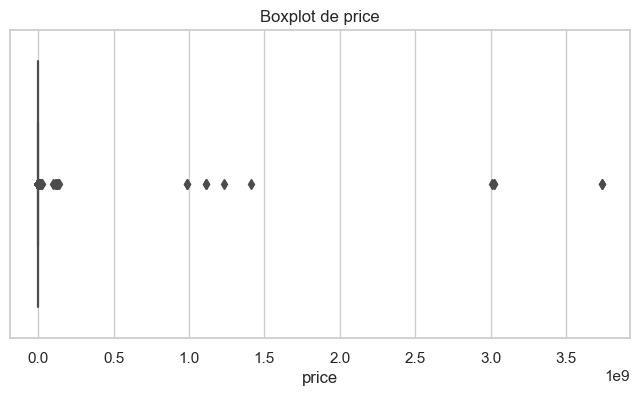

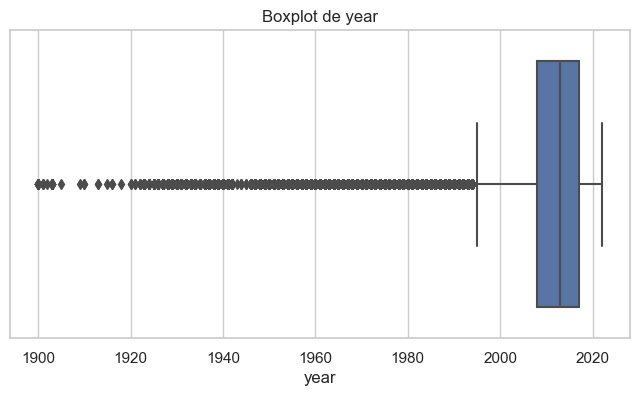

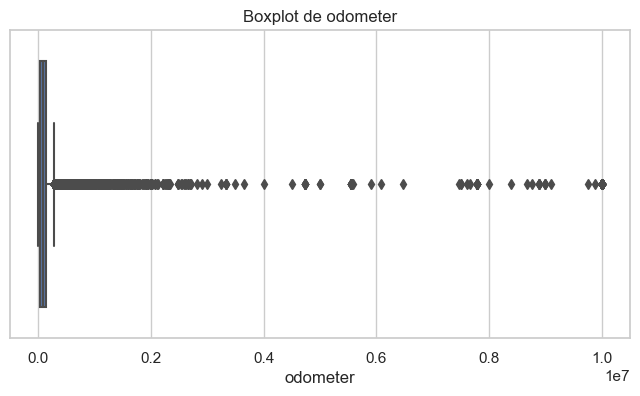

In [59]:
# Detection of outliers and a reasonable range for 'price', 'year' and 'odometer'. For this, we use the interquartile range method (IQR).
numeric_cols = ['price', 'year', 'odometer']
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_dict = {}
for column in numeric_cols:
    outliers = detect_outliers(df, column)
    outliers_dict[column] = len(outliers)

print("Number of outliers per column:")
for column, count in outliers_dict.items():
    print(f"{column}: {count}")

for column in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

#### Comment: we detected an outliers problem with 'price', 'year' and 'odometer'

In [60]:
# Get the range using percentiles to avoid negative values or outliers
def get_percentile_limits(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    return lower_bound, upper_bound

for column in ['price', 'year', 'odometer']:
    lower_bound, upper_bound = get_percentile_limits(df, column)
    print(f"Percentile Limits for {column}: Lower = {lower_bound}, Upper = {upper_bound}")

Percentile Limits for price: Lower = 0.0, Upper = 44500.0
Percentile Limits for year: Lower = 1998.0, Upper = 2020.0
Percentile Limits for odometer: Lower = 6318.0, Upper = 204000.0


In [61]:
# Remove the data point(rows) that doesn´t comply with our range. First, we see which price range is best to take
# $0
price_range_inclusive = (0, 44500)
df_filtered_inclusive = df[(df['price'].between(*price_range_inclusive))]

# $1000
price_range_exclusive = (1000, 44500)
df_filtered_exclusive = df[(df['price'].between(*price_range_exclusive))]

# Comparing the results
print("With $0 included:", df_filtered_inclusive.shape[0])
print("With at least $1000:", df_filtered_exclusive.shape[0])

With $0 included: 405569
With at least $1000: 359254


#### Comment: we choose the range (1000, 44500) for 'price' because we consider the analysis as transactions. If it were, for example, an environmental impact analysis, we would consider including vehicles with $0 included. 

In [62]:
price_range = (1000, 44500)
year_range = (1998, 2020)
odometer_range = (6318, 204000)

df_filtered = df[
    (df['price'].between(*price_range)) &
    (df['year'].between(*year_range)) &
    (df['odometer'].between(*odometer_range))
]

print("Number of rows after filtering:", df_filtered.shape[0])
df_filtered.describe()

Number of rows after filtering: 308797


,id,price,year,odometer,lat,long
count,3.087970e+05,308797.000000,308797.000000,308797.000000,305739.000000,305739.000000
mean,7.311459e+09,17733.083647,2012.547476,91424.222965,38.525858,-93.706250
std,4.377860e+06,11026.604843,4.998327,52387.403224,5.800958,17.981171
min,7.301583e+09,1000.000000,1998.000000,6319.000000,-81.838232,-159.719900
25%,7.308073e+09,7999.000000,2009.000000,44054.000000,34.830000,-106.620000
50%,7.312514e+09,15850.000000,2013.000000,90244.000000,39.300000,-87.376585
75%,7.315216e+09,25995.000000,2017.000000,132000.000000,42.327300,-80.425219
max,7.317101e+09,44500.000000,2020.000000,204000.000000,82.252826,167.629911


In [63]:
# Remove any data point with null values and the resulting number of rows 
df_clean = df_filtered.dropna()
print("Number of rows after removing null values:", df_clean.shape[0])

Number of rows after removing null values: 104132


In [64]:
# Percentage of rows did we remove
initial_rows = 308797  # Este debería ser el número de filas después del filtrado inicial y antes de eliminar valores nulos
final_rows = 104132
percentage_removed = ((initial_rows - final_rows) / initial_rows) * 100
print("Percentage of deleted data:", percentage_removed)

Percentage of deleted data: 66.27816980087242


In [65]:
# Determining the usability of data: before and after cleaning
stats_before = df.describe()
stats_after = df_filtered.describe()

print("Pre-cleaning statistics:\n", stats_before)
print("Statistics after cleaning:\n", stats_after)

Pre-cleaning statistics:
                  id         price           year      odometer            lat  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05  420331.000000   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04      38.493940   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05       5.841533   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     -84.122245   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04      34.601900   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04      39.150100   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05      42.398900   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07      82.390818   

                long  
count  420331.000000  
mean      -94.748599  
std        18.365462  
min      -159.827728  
25%      -111.939847  
50%       -88.432600  
75%       -80.832039  
max       173.885502  
Statistics after cleaning:
          

#### Comment: The dataset is now in a much more usable form for conducting reliable and meaningful analysis, given the substantial improvement in the quality and consistency of the data.

#### 3. Feature Relations

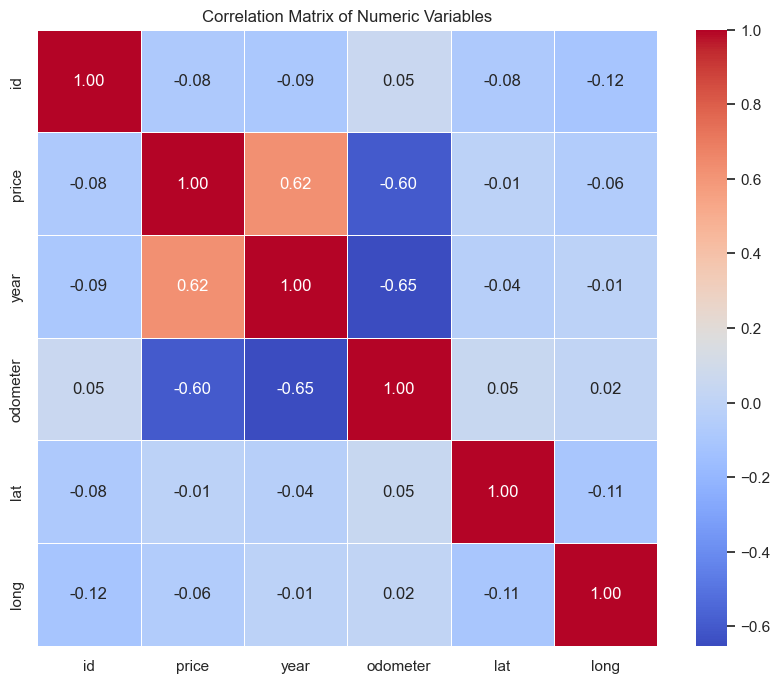

In [66]:
# Correlation Matrix
numeric_df = df_filtered.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

#### Comment: 
#### - 'price' and 'year'(Positive Correlation, 0.62): there is a strong positive correlation between the price and the year of the vehicle. This indicates that newer vehicles tend to have higher prices, which is an expected finding as newer models usually cost more due to technological improvements and less wear. 
#### - 'price' and 'odometer(Negative Correlation, -0.60): there is a significant negative correlation between the price and the odometer. Vehicles with lower mileage tend to have higher prices, which also makes sense since vehicles with less usage generally hold higher value in the market. 
#### - 'year' and 'odometer'(Negative Correlation, -0.65): this negative correlation implies that newer vehicles generally have fewer kilometers, which is logical since they have not been in use as long as older models. 
#### - 'latitude' and 'longitude'(Negative Correlation, -0.11): the correlation between latitude and longitude is relatively low but negative, which could reflect specific geographic patterns of where vehicles are located or how they are distributed across certain regions.

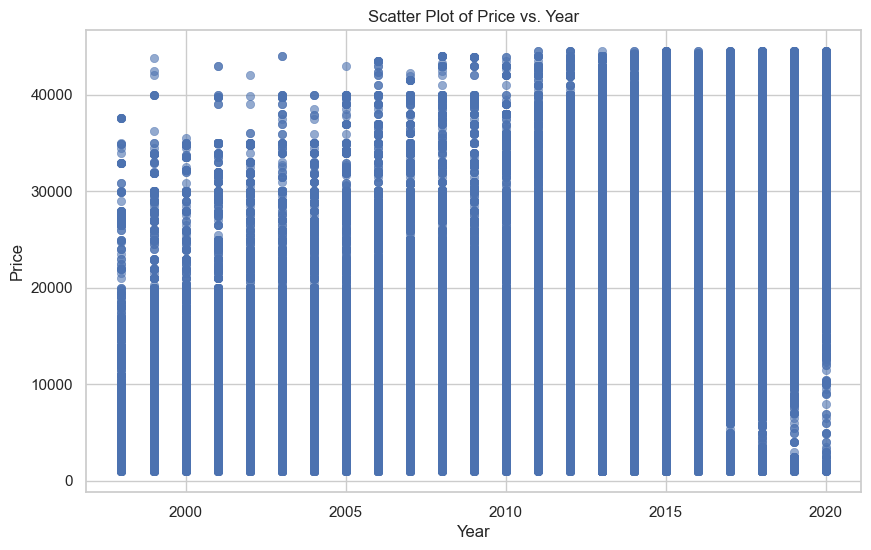

In [67]:
# Scatter plot: 'price'/'year'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df_filtered, alpha=0.6, edgecolor=None)
plt.title('Scatter Plot of Price vs. Year')  
plt.xlabel('Year')  
plt.ylabel('Price')  
plt.show()

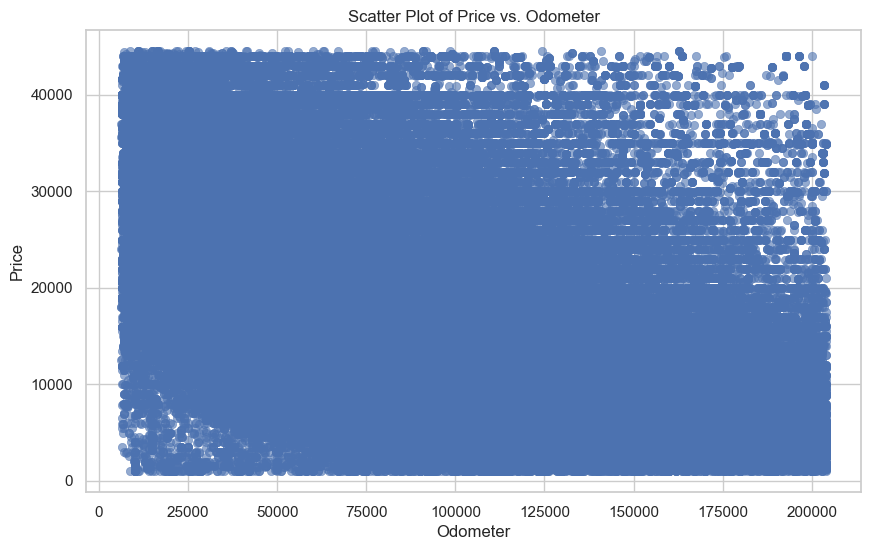

In [68]:
# Scatter plot: 'price'/'odometer'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df_filtered, alpha=0.6, edgecolor=None)
plt.title('Scatter Plot of Price vs. Odometer')  
plt.xlabel('Odometer')  
plt.ylabel('Price')  
plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


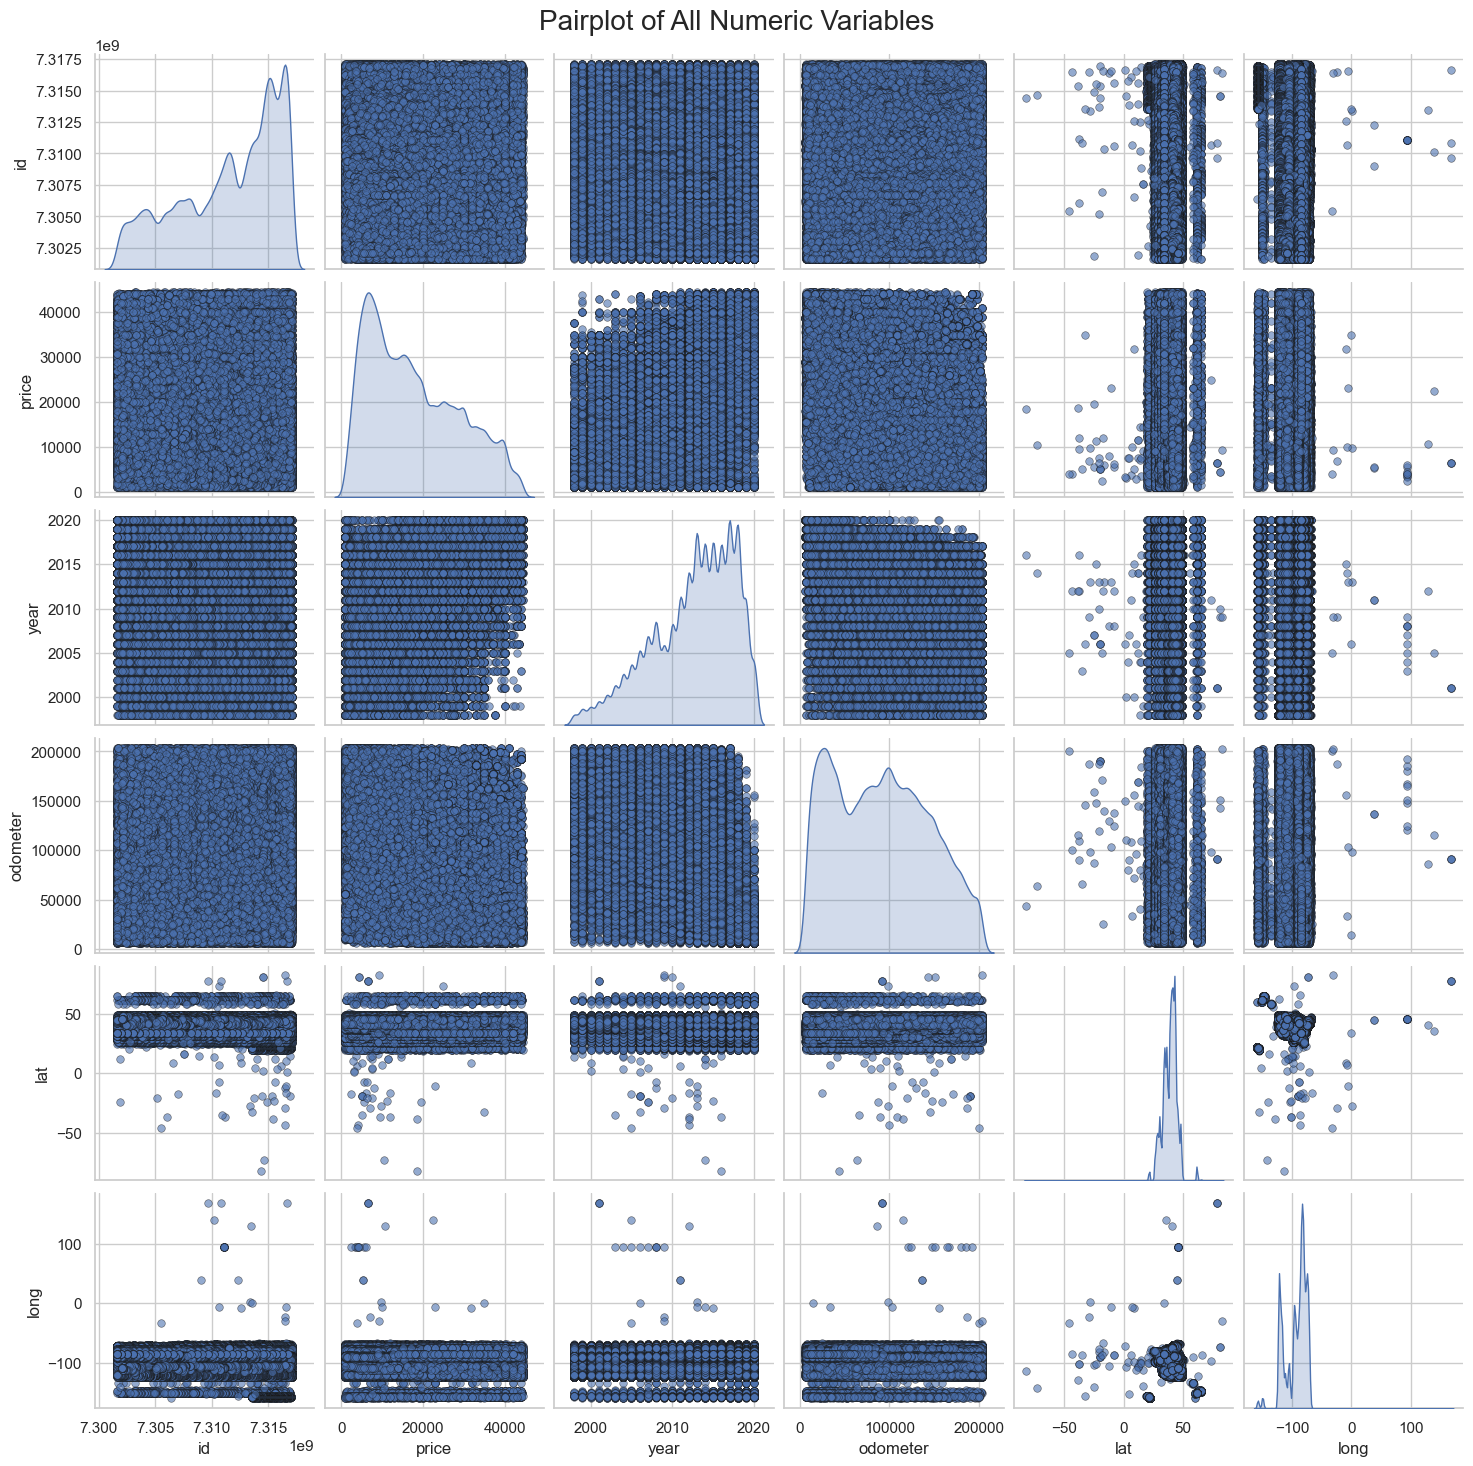

In [69]:
# Scatter plots
sns.set(style="whitegrid")
pairplot = sns.pairplot(df_filtered, plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'}, diag_kind='kde')
pairplot.fig.suptitle('Pairplot of All Numeric Variables', size=20)
pairplot.fig.subplots_adjust(top=0.95)
plt.show()

#### 4. Feature analysis: distribution of the values of a feature

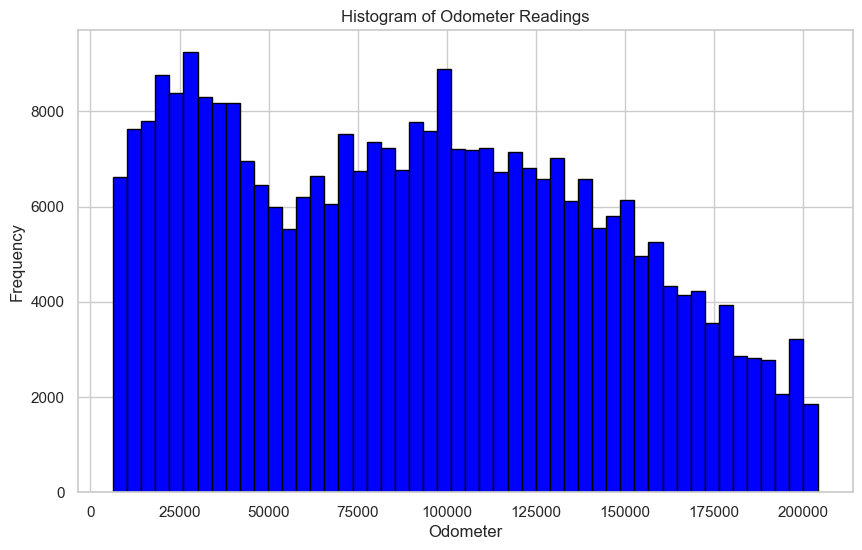

In [70]:
# Histogram of the feature 'odometer'
plt.figure(figsize=(10, 6))  
plt.hist(df_filtered['odometer'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

The maximum frequency is 9239, in the range of 26087.1 to 30040.72 kilometers.


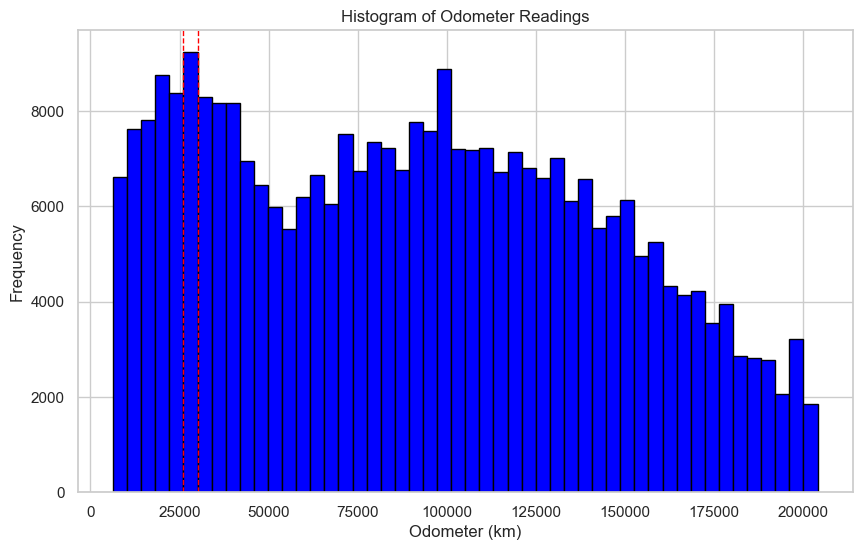

In [71]:
# Frequency maximum
odometer_values = df_filtered['odometer']
frequencies, bin_edges = np.histogram(odometer_values, bins=50)
max_freq_index = np.argmax(frequencies)
max_frequency = frequencies[max_freq_index]
max_bin_start = bin_edges[max_freq_index]
max_bin_end = bin_edges[max_freq_index + 1]
print(f"The maximum frequency is {max_frequency}, in the range of {max_bin_start} to {max_bin_end} kilometers.")

plt.figure(figsize=(10, 6))
plt.hist(odometer_values, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Odometer Readings')
plt.xlabel('Odometer (km)')
plt.ylabel('Frequency')
plt.axvline(x=max_bin_start, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=max_bin_end, color='red', linestyle='dashed', linewidth=1)
plt.show()

#### Comment: analyzing this data helps to better understand how vehicles depreciate and when they are considered most desirable in the secondary market. Therefore, the range of 26,087.1 to 30,040.72 kilometers represents an early point in the lifecycle of many vehicles. This is typically a period where: vehicles are still under warranty (many manufacturers offer warranties that cover up to 36,000 miles or 3 years, which could approximately correspond to the observed mileage range. Owners may choose to sell or exchange the vehicle before the warranty expires) and the vehicle retains a high resale value (at this level of mileage, vehicles generally have suffered significant depreciation from new, but still retain a good portion of their value because they are considered relatively new and with less risk of costly repairs).  

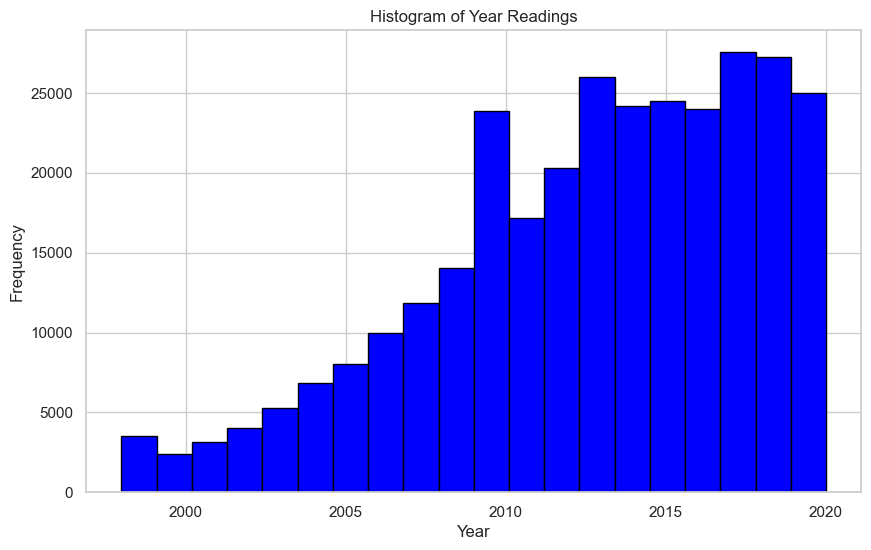

In [72]:
# Histogram of the feature 'year'
plt.figure(figsize=(10, 6))  
plt.hist(df_filtered['year'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Year Readings')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

The maximum frequency is 27547, in the range of 2016.7 to 2017.8 years.


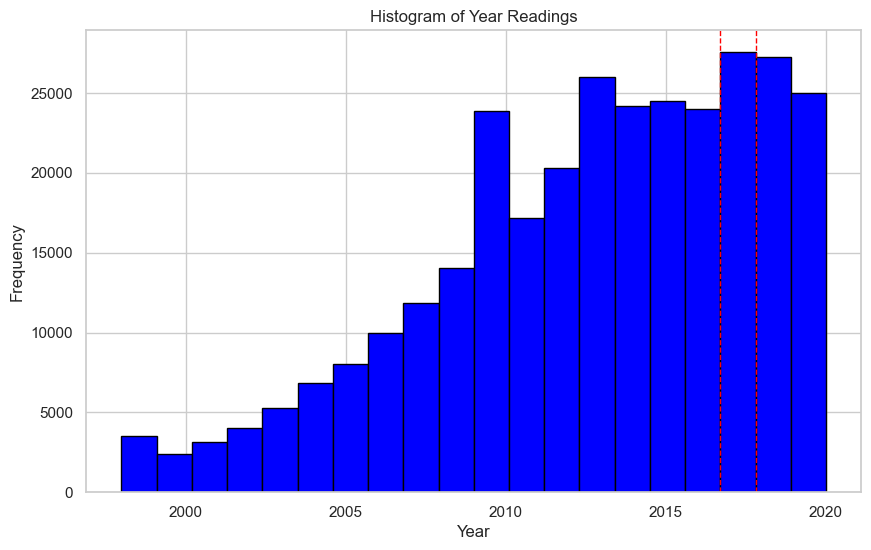

In [73]:
# Frequency maximum
year_values = df_filtered['year']
frequencies, bin_edges = np.histogram(year_values, bins=20)
max_freq_index = np.argmax(frequencies)
max_frequency = frequencies[max_freq_index]
max_bin_start = bin_edges[max_freq_index]
max_bin_end = bin_edges[max_freq_index + 1]
print(f"The maximum frequency is {max_frequency}, in the range of {max_bin_start} to {max_bin_end} years.")

plt.figure(figsize=(10, 6))
plt.hist(year_values, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Year Readings')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.axvline(x=max_bin_start, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=max_bin_end, color='red', linestyle='dashed', linewidth=1)
plt.show()

#### Comment: the maximum frequency in the range of years 2016.7 to 2017.8 is likely due to a combination of factors that make vehicles manufactured in these years particularly common in the dataset:
#### - Leasing and Financing Cycles: many vehicles are purchased on leasing or financing plans that typically last between 2 and 5 years. This may mean that many vehicles from 2016 and 2017 were reaching the end of their leasing or financing terms during the data collection period, leading them to be listed for sale or transfer.
#### - Economic Incentives and Promotions: in those years, there may have been favorable economic conditions, incentives for buyers, or special promotions that boosted sales of new vehicles. This would increase the number of 2016 and 2017 vehicles available in the second-hand market a few years later.
#### - Launches of New Models: if 2016 and 2017 were years when manufacturers introduced new models or made significant updates to existing models, this could have driven sales of these specific models, resulting in a higher frequency of these vehicles in the used market later on.
#### - Consumer Preferences and Resale Value: vehicles from these years might still be perceived as relatively new and modern, offering advanced technologies and better efficiency, which enhances their appeal and resale value. This motivates both sellers and buyers to engage in the market for vehicles from these years.
#### - Data Collection Methodology: it is also possible that there is an over-representation of vehicles from these specific years due to the methodology with which the data was collected, possibly focused on newer vehicles that are more common in online listings or in used vehicle databases.

###  Conclusion
#### Strategic decision for BestCars Inc.
#### As the head of BestCars Inc. which manages a large fleet of leased vehicles, the conclusions drawn from our data analysis are crucial for making informed business decisions. The data reveals several key aspects of the condition, age and usage of our fleet, which directly impact our operating costs and profitability. Based on the analysis, I propose the following strategic decisions: 
#### 1. Given the year characteristic analysis, which showed a peak frequency in newer models (2016 to 2017), it is clear that these vehicles are likely to still be in good condition and have a higher market value. Older vehicles, especially those beyond a typical depreciation curve (say, pre-2010), may not only incur higher maintenance costs, but also represent a depreciated investment. Selling these older vehicles will reduce maintenance costs and free up capital for reinvestment in newer, more efficient models that are more attractive in the leasing market.
#### 2. Sell all high-use cars: Odometer analysis indicates that vehicles with significant mileage are likely to show higher wear and tear. Setting a threshold, such as vehicles with more than 110,000 kilometres, for selling high-mileage vehicles can help minimise breakdown risks and overall maintenance costs; high odometer readings correlate with potential mechanical breakdowns and lower customer satisfaction. By rotating heavily used vehicles, we ensure a fresher and more reliable fleet.
#### 3. Sell all cars in poor condition: Based on the analysis of condition characteristics, vehicles classified in "salvage" condition should be considered for immediate sale. These cars are likely to break down more frequently and may negatively affect the perception of the BestCars Inc. brand if rented to customers. 
#### I consider the need for additional data before making decisions: 
#### - Customer feedback: customer satisfaction data on vehicle age and condition could further validate these decisions. 
#### - Cost analysis data: Detailed records of maintenance costs by vehicle model and age could help refine economic justifications for fleet turnover. 
#### - Market trend data: Understanding general market trends in vehicle resale value can optimise the timing and financial profitability of selling older or heavily used vehicles.
#### The decision to strategically manage the fleet by phasing out older, heavily used or poorly maintained vehicles is not only a reflection of operational efficiency, but also a proactive measure to position BestCars Inc. as a leader in the leasing market. By leveraging data, we can make informed decisions that improve profitability and ensure the company's growth and sustainability in a competitive environment.

# Project extension. Machine Learning Implementation

### While the prior analytical analysis enables decision-making and may not necessarily require the application of machine learning, as the head of BestCars Inc., I decide to employ additional techniques to automate decisions in anticipation of increased operational scale and the need to automate decisions based on continuously updated data. Therefore, to apply machine learning techniques, we use:

### - Regression Model: to predict maintenance costs or depreciation based on the vehicle's 'year', 'odometer', and 'condition'.
### - Classification Model: to determine if a vehicle will be 'high risk', i.e., likely to incur high maintenance costs or have a high probability of failure.

### To evaluate the models:
### - For Regression: use RMSE (Root Mean Squared Error)
### - For Classification: use Precision, recall, f1-score.

### To optimization the models:
### - Hyperparameter Tuning: enhance the models using GridSearchCV

In [74]:
# The categorical variable 'condition' must be converted into a numeric format using techniques such as One-Hot Encoding.
from sklearn.model_selection import train_test_split
df_clean = pd.get_dummies(df_clean, columns=['condition'], drop_first=True)
print(df_clean.head())

            id  region  price    year manufacturer  \
32  7316343444  auburn  27990  2012.0          gmc   
33  7316304717  auburn  34590  2016.0    chevrolet   
35  7316257769  auburn  29990  2016.0    chevrolet   
36  7316133914  auburn  38590  2011.0    chevrolet   
38  7315816316  auburn  32990  2017.0         jeep   

                          model fuel  odometer title_status transmission  ...  \
32  sierra 2500 hd extended cab  gas   68696.0        clean        other  ...   
33        silverado 1500 double  gas   29499.0        clean        other  ...   
35        colorado extended cab  gas   17302.0        clean        other  ...   
36         corvette grand sport  gas   30237.0        clean        other  ...   
38     wrangler unlimited sport  gas   30041.0        clean        other  ...   

   paint_color                                        description state  \
32       black  Carvana is the safer way to buy a car During t...    al   
33      silver  Carvana is the safer w

In [75]:
# Splitting the Data
base_cost = 500
current_year = 2020  # Set this to the last year in your dataset

# Creating a synthetic 'maintenance_cost' column
df_clean['maintenance_cost'] = base_cost + ((current_year - df_clean['year']) * 50) + (df_clean['odometer'] / 10000 * 30)

# Defining the target for regression and classification
y_regression = df_clean['maintenance_cost']
y_classification = (df_clean['maintenance_cost'] > 20000).astype(int)

# Selecting features
X = df_clean[['year', 'odometer']]
X = pd.concat([X, df_clean.filter(like='condition_')], axis=1)  # Adding One-Hot Encoded 'condition' features

# Splitting the dataset into training and testing sets for both tasks
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42)

In [76]:
# NaN values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X['year'] = imputer.fit_transform(X['year'].values.reshape(-1, 1))
X['odometer'] = imputer.transform(X['odometer'].values.reshape(-1, 1))
print(X.isnull().sum())

# Regression Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Predicting and evaluating the model
y_pred_reg = regressor.predict(X_test_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
print(f"RMSE: {rmse}")

year                   0
odometer               0
condition_excellent    0
condition_good         0
condition_new          0
condition_salvage      0
dtype: int64
RMSE: 0.5565551593828864


#### Comment: an RMSE of 0.56 suggests thar the model predicts maintenance costs with a fairly low mean squared error.

In [77]:
# Optimization: GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees 
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Initialize GridSearchCV with a RandomForestRegressor
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           verbose=2,  # Show detailed information during execution
                           n_jobs=-1)  # Use all available cores

# Train GridSearchCV with the training set
grid_search.fit(X_train_reg, y_train_reg)

# Display the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Prediction using the best model and the test set
y_pred_reg = best_model.predict(X_test_reg)

# Calculate the RMSE between the predictions and the true values
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print(f"RMSE optimized: {rmse}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
RMSE optimized: 0.5565551593828864


#### Comment: the RMSE does not change, so the model may already be well-fitted or, although it generalizes well to some extent, it may be overfitting.

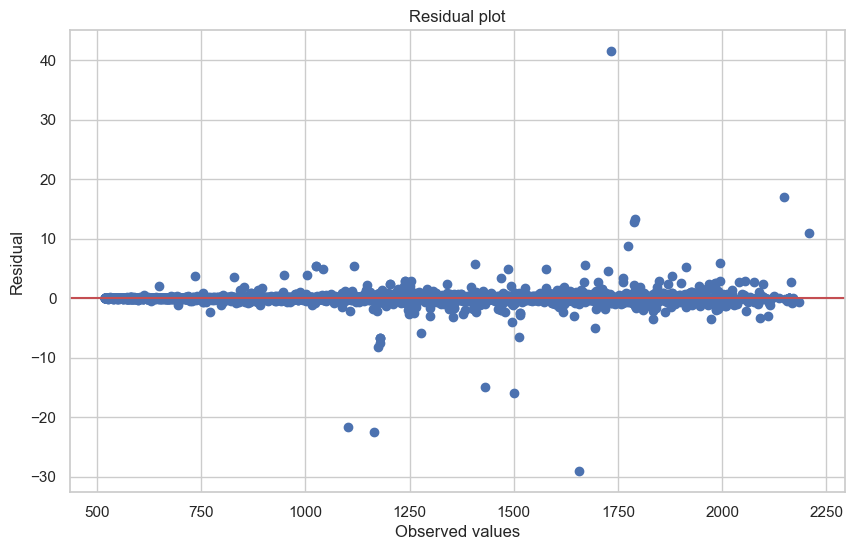

In [78]:
residual = y_test_reg - y_pred_reg # difference between observed and predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test_reg, residual)
plt.title('Residual plot')
plt.xlabel('Observed values')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

#### Comment: it is an ideal residual plot, the points should be randomly distributed around the horizontal zero line, without forming and discernible pattern. The model is fairly consistent!.

In [79]:
# Classifier Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Model training
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_cls, y_train_cls)

# Model prediction and evaluation
y_pred_cls = classifier.predict(X_test_cls)
report = classification_report(y_test_cls, y_pred_cls)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20827

    accuracy                           1.00     20827
   macro avg       1.00      1.00      1.00     20827
weighted avg       1.00      1.00      1.00     20827



#### Comment: with the results of these metrics, it is deduced that there are no high-risk vehicles with the proposed threshold 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12780
           1       1.00      1.00      1.00      8047

    accuracy                           1.00     20827
   macro avg       1.00      1.00      1.00     20827
weighted avg       1.00      1.00      1.00     20827



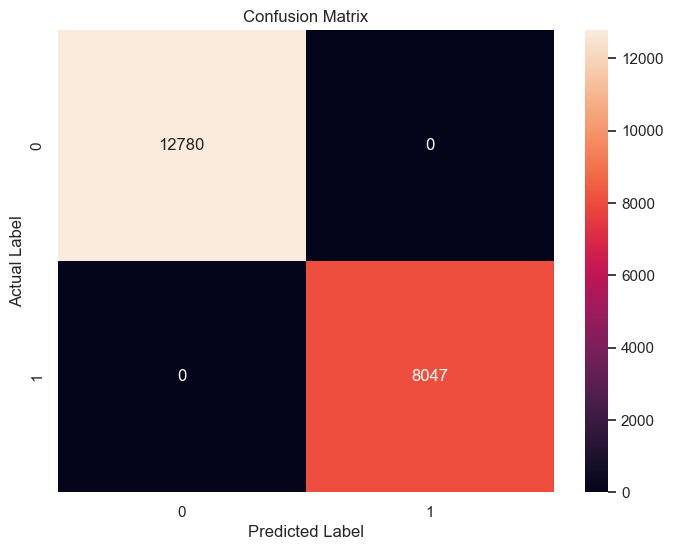

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
# Risk rating adjustments
df_clean['high_risk'] = ((df_clean['maintenance_cost'] > 20000) |
                         (df_clean['year'] <= 2010) |
                         (df_clean['odometer'] > 110000) |
                         (df_clean['condition_salvage'] == 1)).astype(int)

X = df_clean[['year', 'odometer']]  
X = pd.concat([X, df_clean.filter(like='condition_')], axis=1) 
y = df_clean['high_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)

# Visualisation of the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#### Comment 1: after adjustments, two classes were evaluated (0 for low-risk vehicles and 1 for high-risk vehicles), leading to a more balanced distribution. The model performs exceptionally well, identifying all cases correctly. However, the perfect classification on every sample might also indicate potential overfitting. Given the results, further optimization through hyperparameter tuning might not be necessary unless overfitting concerns are confirmed with additional validation techniques or more diverse data.
#### Comment 2: the Confusion Matrix is perfect in terms of classification, indicating that the model has correctly predicted all the labels in the test set. 
#### Details based on the confusion matrix are as follows:
#### - True Negatives (TN): 12780 - The model has correctly predicted that these cases are not high risk.
#### - False Positives (FP): 0 - The model has made no errors in predicting non-risk cases as risky.
#### - False Negatives (FN): 0 - There are no cases where the model has failed to predict a high-risk case as non-risky.
#### - True Positives (TP): 8047 - The model has correctly identified all the high-risk cases.

###  Final conclusion
#### Both Machine Learning models address each of these strategic points in an informed manner.
#### 1. Sell all cars older than a specific year: the regression model, which predicts maintenance costs based on the vehicle's year, can help identify from which year vehicles begin to generate significantly higher maintenance costs. This can be a good indicator of when a vehicle becomes less profitable, and therefore, a good candidate for sale.
#### 2. Sell all cars with heavy usage (significant odometer values): similar to the vehicle year, the regression model provides insights on how mileage affects maintenance costs. Vehicles with high odometer readings that are predicted to incur higher maintenance costs could be sold to avoid excessive future expenses.
#### 3. Sell all cars with a bad condition: the classification model that identifies high-risk vehicles can include those in poor condition as part of its risk assessment. This model could help determine which vehicles in poor condition are more likely to incur high maintenance costs or failures, making them candidates for sale.
#### Integrating the results of these models into the fleet management strategy of BestCars Inc. allows for data-driven decisions on when to sell vehicles based on year, usage, and condition. This not only optimizes the fleet but also enhances profitability by reducing unnecessary maintenance costs and maximizing the resale value of the vehicles

# That's all!.